# Importing Flat Files from the Web

Learned:
1. Flat file .txt and .csv files
2. Pickled Files, Excel Sheets
3. SQL Relational Databases

All these skills involve importing data we have locally.

What if Data is online?  We need to import from WWW
- Downloading files has reproducability issues if they can't reproduce your workflow.  
- Not scalable - downloading 100 of these files would take forever.  
- But if you write in code, the workflow can scale
- How to use Python code to Import and save datasets from the web
- Load datasets into pandas DataFrames
- Make HTTP Requests (GET Requests), means getting data from the web
- Scrab web data such as HTML.  use Beautiful Soup to parse HTML
- Packages include urllib and request packages

#### urllib package
- Provides iterface for fetching data across the web
- urlopen() - accepts URLs instead of file names.  Similar to the open() function.  Accepts URLs instead of file names.

We will import the wine quality database

We will also load contents of web files directly into pandas dataframes without having to save them locally

In [3]:
from urllib.request import urlretrieve

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

urlretrieve(url, 'winequality-white.csv')

('winequality-white.csv', <http.client.HTTPMessage at 0x105340550>)

#### Importing flat files from the web: your turn!

You are about to import your first file from the web! The flat file you will import will be 'winequality-red.csv' from the University of California, Irvine's Machine Learning repository. The flat file contains tabular data of physiochemical properties of red wine, such as pH, alcohol content and citric acid content, along with wine quality rating.

In [4]:
# Import package
from urllib.request import urlretrieve

# Import pandas
import pandas as pd

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Save file locally
urlretrieve(url, 'winequality-red.csv')

# Read file into a DataFrame and print its head
df = pd.read_csv('winequality-red.csv', sep=';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

#### Opening and reading flat files from the web

You have just imported a file from the web, saved it locally and loaded it into a DataFrame. If you just wanted to load a file from the web into a DataFrame without first saving it locally, you can do that easily using pandas. In particular, you can use the function pd.read_csv() with the URL as the first argument and the separator sep as the second argument

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

/Users/naidaire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


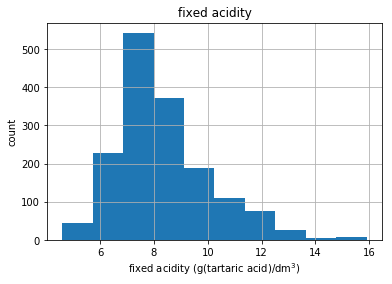

In [5]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Read file into a DataFrame: df
df = pd.read_csv(url, sep=';')

# Print the head of the DataFrame
print(df.head())

# Plot first column of df
pd.DataFrame.hist(df.ix[:, 0:1])
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()


#### Importing non-flat files from the web - Excel

Congrats! You've just loaded a flat file from the web into a DataFrame without first saving it locally using the pandas function pd.read_csv(). This function is super cool because it has close relatives that allow you to load all types of files, not only flat ones. In this interactive exercise, you'll use pd.read_excel() to import an Excel spreadsheet.

Your job is to use pd.read_excel() to read in all of its sheets, print the sheet names and then print the head of the first sheet using its name, not its index.

Note that the output of pd.read_excel() is a Python dictionary with sheet names as keys and corresponding DataFrames as corresponding values.

In [12]:
# Import package
import pandas as pd

# Assign url of file: url
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

# Read in all sheets of Excel file: xl
xl = pd.read_excel(url, sheetname=None)

# Print the sheetnames to the shell
print(xl.keys())

# Print the head of the first sheet (using its name, NOT its index)
print(xl['1700'].head())

odict_keys(['1700', '1900'])
                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


## HTTP requests to import files from the Web

We import files from the web using the urlretrieve function 

URL - Uniform Resource Locator
- References to Web Resources
- Web Addresses - we will focus on this
- FTP, Database Access

Web Addresse Ingredients:
- Protocol identifier - http:
- Resource name - datacamp.com
- Protocol identifier + Resource Name = identity of the web address.

HTTP = HyperText Transfer Protocol
- Wikipedia description
- application protocol for distributive collaborative
- foundation of communication for the world wide web
- http request to a server, this request is a GET request
- https is more secure form of http
- We are performing GET request with urlretrieve
- Saves relevant data locally
- HTML stands for Hyper Text Markup language



#### Get request using urllib sample

In [14]:


from urllib.request import urlopen, Request

url = 'https://www.wikipedia.org/'

# package the GET request using the function Request
request = Request(url)

# Send the request and catch the response with urlopen
# This returns an HTTPResponse object
# which has an associated read method
response = urlopen(request)

# apply this read method to the response
# which returns the HTML as a string
# which you store in variable html
html = response.read()

# be polite and close the response
response.close()




#### Performing HTTP requests in Python using urllib

Now that you know the basics behind HTTP GET requests, it's time to perform some of your own. In this interactive exercise, you will ping our very own DataCamp servers to perform a GET request to extract information from our teach page, 

In [18]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "http://www.datacamp.com/teach/documentation"

# This packages the request: request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Print the datatype of response
print(type(response))

# Be polite and close the response!
response.close()

<class 'http.client.HTTPResponse'>


#### Printing HTTP request results in Python using urllib

You have just packaged and sent a GET request to "http://www.datacamp.com/teach/documentation" and then caught the response. You saw that such a response is a http.client.HTTPResponse object. The question remains: what can you do with this response?

Well, as it came from an HTML page, you could read it to extract the HTML and, in fact, such a http.client.HTTPResponse object has an associated read() method. In this exercise, you'll build on your previous great work to extract the response and print the HTML.

In [19]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "http://www.datacamp.com/teach/documentation"

# This packages the request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Extract the response: html
html = response.read()

# Print the html
print(html)

# Be polite and close the response!
response.close()


b'<!doctype html>\n<html lang="en" data-direction="ltr">\n  <head>\n    <link href="https://fonts.intercomcdn.com" rel="preconnect" crossorigin>\n      <script src="https://www.googletagmanager.com/gtag/js?id=UA-39297847-9" async="async" nonce="g0gZQrsIX3nKnWDBAFNQsjM9HA7+f+agTYGaVmDuh4E="></script>\n      <script nonce="g0gZQrsIX3nKnWDBAFNQsjM9HA7+f+agTYGaVmDuh4E=">\n        window.dataLayer = window.dataLayer || [];\n        function gtag(){dataLayer.push(arguments);}\n        gtag(\'js\', new Date());\n        gtag(\'config\', \'UA-39297847-9\');\n</script>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <title>DataCamp Help Center</title>\n    <meta name="description" content="">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n      <meta name="intercom:trackingEvent" content="{&quot;name&quot;:&quot;Viewed Help Center&quot;,&quot;metadata&quot;:{&quot;action&quot;:&quot;viewed&quot;,&quot;object&quot;:&quot;edu

### GET requests using REQUESTS

Requests Package - which provides a wonderful API for making requests.

Requests allows you to send organic, grass-fed HTTP/1 dot 1 requests, without the need for manual labor

Organizations that use requests:
- her Majesty's Government
- Amazon
- Twilio
- Twitter
- Google
- Twilio
- NPR
- Obama for America
- Sony
- Federal US Institutions that prefer to be unnamed

Most downloaded package of all time.  7M downloads every month.  All the cool kids are doing it!



In [17]:
# import package
import requests

# specify URL
url = 'https://www.wikipedia.org/'

# package the request,send the request, catch the response
# with a single function!  requests.get(url)
r = requests.get(url)

# apply the text method to the response
# which returns the html as a string
text = r.text

#### Performing HTTP requests in Python using requests

Now that you've got your head and hands around making HTTP requests using the urllib package, you're going to figure out how to do the same using the higher-level requests library. You'll once again be pinging DataCamp servers for their "http://www.datacamp.com/teach/documentation" page.

Note that unlike in the previous exercises using urllib, you don't have to close the connection when using requests!

In [20]:
# Import package
import requests

# Specify the url: url
url = "http://www.datacamp.com/teach/documentation"

# Packages the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response: text
# Use the text attribute of the object r 
# to return the HTML of the webpage as a string; 
# store the result in a variable text
text = r.text

# Print the html
print(text)

<!doctype html>
<html lang="en" data-direction="ltr">
  <head>
    <link href="https://fonts.intercomcdn.com" rel="preconnect" crossorigin>
      <script src="https://www.googletagmanager.com/gtag/js?id=UA-39297847-9" async="async" nonce="BPDjOwuNOqDFfrGDKx2RYjpEcgAlFI4cX+N17jGMJ+o="></script>
      <script nonce="BPDjOwuNOqDFfrGDKx2RYjpEcgAlFI4cX+N17jGMJ+o=">
        window.dataLayer = window.dataLayer || [];
        function gtag(){dataLayer.push(arguments);}
        gtag('js', new Date());
        gtag('config', 'UA-39297847-9');
</script>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <title>DataCamp Help Center</title>
    <meta name="description" content="">
    <meta name="viewport" content="width=device-width, initial-scale=1">
      <meta name="intercom:trackingEvent" content="{&quot;name&quot;:&quot;Viewed Help Center&quot;,&quot;metadata&quot;:{&quot;action&quot;:&quot;viewed&quot;,&quot;object&quot;:&quot;educate_home&quot;,&quot;pl

# Scraping the web in Python

